# PRIYANKA PRAKASH KATARIYA | BL.EN.U4AIE21107

# LAB ASSIGNMENT-7 | 28th March 2024

In [68]:
#importing necessary libraries for creating an hmm model using the given audio - 'AI in Speech Processing'
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [69]:
sampling_freq, audio = wavfile.read('/Users/localadmin/Desktop/VI/AISP/audios/AIinSPaudiofeb1.wav')
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (104536,)
Datatype: int16
Duration: 2.178 seconds


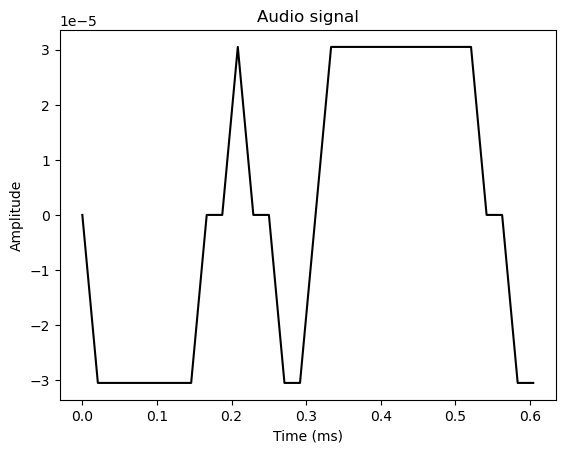

In [70]:
#normalizing the audio data
audio=audio/2.**15
audio=audio[:30]
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [71]:
#tranforming the audio from time domain to frequency domain to extract mfcc feature coefficients
transformed_signal = np.fft.fft(audio)

In [72]:
half_length = np.ceil((len(audio) + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

/var/folders/yy/w_zhskrd2tsfcth5m01v198w0000gn/T/ipykernel_45595/1923125567.py:2: RuntimeWarning: divide by zero encountered in log10
  power = 20 * np.log10(transformed_signal)


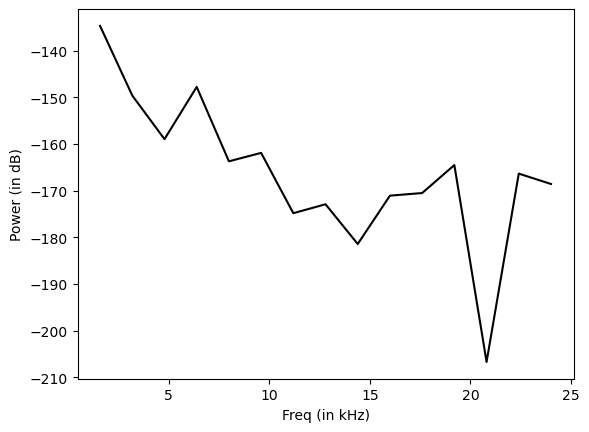

In [76]:
#power spectrum plot for the frequency domain audio signal
power = 20 * np.log10(transformed_signal)
x_values = np.arange(0, half_length, 1) * ((sampling_freq / len(audio)) / 1000.0)
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

In [46]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=c2a63b085948ff65f70515ccddd072fb650b30d13606fa5f0abbee766e72851f
  Stored in directory: /Users/localadmin/Library/Caches/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features
Note: you may need to restart the kernel to use updated packages.


[[-4.22786101 -4.79946682 -3.88848608 -3.75673578 -4.17165793 -3.36810462
  -2.79091504 -2.59560705 -1.37734746 -1.26494298 -1.21367345 -1.40950292
  -0.453133    0.03853776 -0.01315299  0.90380006  1.71810224  1.71907131
   1.51137154  1.18606251  1.81804231  1.94984438  2.08753474  2.18588011
   2.23860587  2.22430961]
 [-3.49157874 -3.970606   -3.30920974 -3.38440913 -3.64720162 -3.13906085
  -2.69938522 -2.4950898  -0.87003423 -0.7404439  -0.89123003 -1.10939252
   0.04091443  0.45347731  0.25908732  1.19342339  1.83456887  1.98605953
   1.67706408  1.42284944  1.76130766  1.95972246  2.15395331  2.17593594
   2.29974455  2.29745236]]


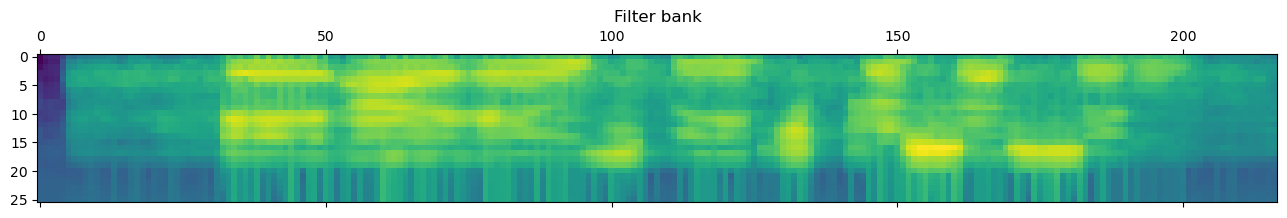

In [51]:
#obtaining mfcc features
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


#Read in the audio file
(rate,sig) = wav.read("/Users/localadmin/Desktop/VI/AISP/audios/AIinSPaudiofeb1.wav")

# Calculate the mfcc features based on the file data
mfcc_feat = mfcc(sig, rate, nfft=1200)

# Calculate the filterbank from the audio file
fbank_feat = logfbank(sig, rate, nfft=1200)

#Print the result
print(fbank_feat[1:3, :])

filterbank_features = fbank_feat.T
plt.matshow(filterbank_features)
plt.title('Filter bank')

plt.show()

In [52]:
fbank_feat.shape
Out[4]: (111, 26)

In [59]:
input_data = wav.read("/Users/localadmin/Desktop/VI/AISP/audios/AIinSPaudiofeb1.wav")

In [64]:
#training using hmm
from hmmlearn import hmm
import numpy as np

# Class to handle all HMM related processing
class HMMTrainer(object):

    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components,
                    covariance_type=self.cov_type, n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))
    # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)
        print('score',self.model.score(input_data))

In [55]:
#pip install hmmlearn